In [1]:
import sys ; sys.path.insert(0, '../')
from notebook_tools import *
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.interpolate import interp1d

In [24]:
figures_path = '/Users/erezcohen/Desktop/Projects/Talks/Dec17IPSposter/'

In [3]:
nominal_results = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/nominal_results.csv')
nominal_results

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_x_final,sigma_x_final_up_err,sigma_x_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_y_final,sigma_y_final_up_err,sigma_y_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_t_final,sigma_t_final_err_sys,sigma_t_final_up_err_stat,sigma_t_final_dw_err_stat,sigma_t_final_up_err_tot,sigma_t_final_dw_err_tot
0,0,$^{12}$C,0.157110,0.006865,0.141154,0.006727,0.006931,0.160396,0.007007,0.145580,0.006991,0.006991,0.158720,0.004904,0.143315,0.003527,0.004158,0.004158,0.005453,0.005516
1,1,$^{27}$Al,0.180235,0.013666,0.161716,0.014522,0.014462,0.165708,0.012570,0.150000,0.013002,0.012582,0.172366,0.009252,0.155131,0.006954,0.008345,0.008345,0.010863,0.010685
2,2,$^{56}$Fe,0.177601,0.008388,0.155587,0.008732,0.008627,0.184577,0.008706,0.162558,0.009701,0.009195,0.180959,0.006040,0.158777,0.005362,0.005285,0.005285,0.007529,0.007351
3,3,$^{208}$Pb,0.195017,0.020634,0.172636,0.022748,0.021623,0.163082,0.017300,0.147783,0.017755,0.017620,0.176265,0.013257,0.157442,0.011272,0.011589,0.011589,0.016167,0.015880


In [4]:
modified_results = dict()
for extraname in ['MeanZLinearInPmiss','mean_rms','ConstBandAroundMeasuredValues']:
    modified_results[extraname] = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/'+extraname+'.csv')
    modified_results[extraname]['A'] = [12,27,56,208]
modified_results['ConstBandAroundMeasuredValues']    

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_xConstBandAroundMeasuredValues_final,sigma_xConstBandAroundMeasuredValues_final_up_err,sigma_xConstBandAroundMeasuredValues_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_yConstBandAroundMeasuredValues_final,...,sigma_yConstBandAroundMeasuredValues_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_tConstBandAroundMeasuredValues_final,sigma_tConstBandAroundMeasuredValues_final_err_sys,sigma_tConstBandAroundMeasuredValues_final_up_err_stat,sigma_tConstBandAroundMeasuredValues_final_dw_err_stat,sigma_tConstBandAroundMeasuredValues_final_up_err_tot,sigma_tConstBandAroundMeasuredValues_final_dw_err_tot,A
0,0,$^{12}$C,0.157110,0.006865,0.140983,0.008344,0.007930,0.160396,0.007007,0.146167,...,0.008345,0.158720,0.004904,0.143510,0.005596,0.004371,0.004175,0.007100,0.006981,12
1,1,$^{27}$Al,0.180235,0.013666,0.161266,0.014413,0.013877,0.165708,0.012570,0.150219,...,0.012450,0.172366,0.009252,0.155150,0.006837,0.008356,0.007931,0.010797,0.010472,27
2,2,$^{56}$Fe,0.177601,0.008388,0.157048,0.010732,0.010380,0.184577,0.008706,0.163696,...,0.011162,0.180959,0.006040,0.160120,0.007930,0.005557,0.005139,0.009683,0.009449,56
3,3,$^{208}$Pb,0.195017,0.020634,0.169815,0.021063,0.019828,0.163082,0.017300,0.144613,...,0.014676,0.176265,0.013257,0.153331,0.007254,0.011207,0.010708,0.013349,0.012934,208


In [5]:
NoPrecFiducials_results = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/final_results/NoPrecFiducials.csv')
NoPrecFiducials_results['A'] = [12,27,56,208]
NoPrecFiducials_results

,Unnamed: 0,target,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_xNoPrecFiducials_final,sigma_xNoPrecFiducials_final_up_err,sigma_xNoPrecFiducials_final_dw_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_yNoPrecFiducials_final,...,sigma_yNoPrecFiducials_final_dw_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_tNoPrecFiducials_final,sigma_tNoPrecFiducials_final_err_sys,sigma_tNoPrecFiducials_final_up_err_stat,sigma_tNoPrecFiducials_final_dw_err_stat,sigma_tNoPrecFiducials_final_up_err_tot,sigma_tNoPrecFiducials_final_dw_err_tot,A
0,0,$^{12}$C,0.153205,0.006371,0.138753,0.006337,0.006143,0.158348,0.006581,0.143918,...,0.006483,0.155693,0.004577,0.141237,0.003054,0.003983,0.003905,0.005019,0.004957,12
1,1,$^{27}$Al,0.182660,0.013470,0.165327,0.014079,0.014696,0.170539,0.012577,0.153943,...,0.012747,0.176184,0.009193,0.159009,0.006918,0.008224,0.008310,0.010747,0.010813,27
2,2,$^{56}$Fe,0.174405,0.007898,0.154357,0.008002,0.008244,0.184229,0.008333,0.161685,...,0.008582,0.179054,0.005732,0.157712,0.005074,0.004849,0.004730,0.007018,0.006936,56
3,3,$^{208}$Pb,0.189214,0.019198,0.168937,0.020919,0.020269,0.159613,0.016236,0.143996,...,0.016060,0.171957,0.012397,0.153268,0.010011,0.010495,0.010559,0.014504,0.014550,208


# generated vs. reconstructed in bins of generated

In [7]:
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] # ,'Mott','DipoleFF2'
data_allPmiss_PrecFid , data300Pmiss600_PrecFid = dict() , dict()
for target in ['C12','Al27','Fe56','Pb208']:
    data_allPmiss_PrecFid[target] = read_root( path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target, columns=columns )
    data300Pmiss600_PrecFid[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]

In [8]:
cm_parameters = dict()
cm_parameters_with_correction = dict()
for Fiducials in ["NoPrecFiducials","PrecFiducials"]:
    cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/300Pmiss600/alltargets_'+Fiducials+'_dataCMparameters.csv')
    cm_pars['sigma_x_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_x_unweighted']) - np.square(0.02))
    cm_pars['sigma_x_before_acc_corr_err'] = cm_pars['sigma_xErr_unweighted']
    cm_pars['sigma_y_before_acc_corr'] = np.sqrt(np.square(cm_pars['sigma_y_unweighted']) - np.square(0.02))
    cm_pars['sigma_y_before_acc_corr_err'] = cm_pars['sigma_yErr_unweighted']
    
    
    # weighted average
    sigma_x, Dsigma_x = cm_pars['sigma_x_before_acc_corr'], cm_pars['sigma_x_before_acc_corr_err']
    sigma_y, Dsigma_y = cm_pars['sigma_y_before_acc_corr'], cm_pars['sigma_y_before_acc_corr_err']
    sigma_t = (sigma_x/np.square(Dsigma_x)+sigma_y/np.square(Dsigma_y))/( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y))
    cm_pars['sigma_t_before_acc_corr'] = sigma_t    
    Dsigma_t = np.sqrt(1./( 1./np.square(Dsigma_x) + 1./np.square(Dsigma_y) ))
    cm_pars['sigma_t_before_acc_corr_err'] = Dsigma_t
    cm_parameters[Fiducials] = cm_pars
    cm_parameters_with_correction[Fiducials] = cm_pars
cm_parameters[Fiducials]

,Nevts,chi2red_x_unweighted,chi2red_y_unweighted,chi2red_z_unweighted,mean_xErr_unweighted,mean_x_unweighted,mean_yErr_unweighted,mean_y_unweighted,mean_zErr_unweighted,mean_z_unweighted,...,sigma_zErr_unweighted,sigma_z_unweighted,target,A,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,266,0.602767,0.407306,2.139232,0.009711,-0.026697,0.009910,-0.005837,0.009028,0.106593,...,0.006384,0.147251,$^{12}$C,12,0.157110,0.006865,0.160396,0.007007,0.158720,0.004904
1,88,1.058674,0.542381,0.460758,0.019329,-0.035170,0.017791,0.017157,0.015036,0.118663,...,0.010629,0.141058,$^{27}$Al,27,0.180235,0.013666,0.165708,0.012570,0.172366,0.009252
2,227,0.471936,0.458693,1.598486,0.011862,-0.027254,0.012322,-0.009223,0.009999,0.149765,...,0.007069,0.150658,$^{56}$Fe,56,0.177601,0.008388,0.184577,0.008706,0.180959,0.006040
3,45,0.847317,0.596230,0.395723,0.029217,-0.024147,0.024489,0.016012,0.025269,0.177513,...,0.017832,0.169545,$^{208}$Pb,208,0.195017,0.020634,0.163082,0.017300,0.176265,0.013257


In [9]:
cm_parameters[Fiducials][['sigma_x_before_acc_corr','sigma_x_before_acc_corr_err','sigma_y_before_acc_corr','sigma_y_before_acc_corr_err','sigma_t_before_acc_corr','sigma_t_before_acc_corr_err']]

,sigma_x_before_acc_corr,sigma_x_before_acc_corr_err,sigma_y_before_acc_corr,sigma_y_before_acc_corr_err,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err
0,0.157110,0.006865,0.160396,0.007007,0.158720,0.004904
1,0.180235,0.013666,0.165708,0.012570,0.172366,0.009252
2,0.177601,0.008388,0.184577,0.008706,0.180959,0.006040
3,0.195017,0.020634,0.163082,0.017300,0.176265,0.013257


## cm_parameters['PrecFiducials']

In [10]:
targets = ['C','Al','Fe','Pb']
target_names = [r'$^{12}$C',r'$^{27}$Al',r'$^{56}$Fe',r'$^{208}$Pb']
colors = ['red','blue','forestgreen','purple']
As = [12,27,56,208]
Neep = [7598,2573,8558,2635]
Neepp = [266,88,227,45]

# the simulation assumes a Gaussian distribution around the meas. values with 5 standard deviations as width

In [12]:
nominal_results['A']=[12,27,56,208]

In [13]:
nominal_results[['sigma_t_before_acc_corr','sigma_t_before_acc_corr_err'
                                                ,'sigma_t_final'
                                                ,'sigma_t_final_up_err_tot','sigma_t_final_dw_err_tot']].astype(float)

,sigma_t_before_acc_corr,sigma_t_before_acc_corr_err,sigma_t_final,sigma_t_final_up_err_tot,sigma_t_final_dw_err_tot
0,0.158720,0.004904,0.143315,0.005453,0.005516
1,0.172366,0.009252,0.155131,0.010863,0.010685
2,0.180959,0.006040,0.158777,0.007529,0.007351
3,0.176265,0.013257,0.157442,0.016167,0.015880


# $x$ and $y$ directions seperately

## final plot

In [52]:
def plot_needed_for_A_depdendence_sigma_t(ax=None,figsize=(16,15),s=30,
                                          xlim=(2.5,250), ylim=(0,200), #79
                                          labels=dict({'$^4$He':(3.5,122),
                                                '$^{12}$C':(9,165),
                                                '$^{27}$Al':(21,182),
                                                '$^{56}$Fe':(45,185),
                                                '$^{208}$Pb':(140,184),                                               
                                                      }),
                                          fontsize=55,labels_fontsize=50,
                                          do_Ciofi=True,do_plot_calculation_lines=True,do_previous_data=True):
    from scipy.interpolate import interp1d

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    # for all plots
    if do_plot_calculation_lines:
        plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
        plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-',color='black', vary='nl00',label='Colle et al., $^1S_0$ pairs')
    if do_Ciofi: 
        ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,markeredgecolor='black',marker='*',ms=30,mfc='none',linewidth=0, markeredgewidth=2,label='Ciofi and Simula')
    if do_previous_data:
        plot_data( data=BNL_Data, ax=ax, Ashift=1 , color='blue', marker='s', label=None )
        plot_data( data=HallA_Data, ax=ax, Ashift=-1 , color='blue' , marker='s' , label='Hall-A/BNL' )
        plot_data( data=Korover_Data , ax=ax, marker='s' , color='blue', label=None )
    
    ax.set_xscale('log')
    set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=fontsize 
             ,xticks=[4,12,27,56,208]
             ,yticks=[100,125,150,175,200])
    ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)    
    if xlim is not None:    ax.set_xlim(xlim);
    if ylim is not None:    ax.set_ylim(ylim);
    # target name labels
    for label in list(labels.keys()):
        ax.text(labels[label][0],labels[label][1],label,fontsize=labels_fontsize)
    return ax

def plot_A_depdendence_sigma_t(data=None,
                               figsize=(16,15),s=30,fontsize=55,
                               xlim=(2.5,250), ylim=(79,200),  #79
                               do_save_fig=True, filename='corrected_sigma_t_with_calculations',
                               labels=dict({'$^4$He':(3.5,122), '$^{12}$C':(9,165), '$^{27}$Al':(21,182),
                                            '$^{56}$Fe':(45,189), '$^{208}$Pb':(140,194), }),
                               do_Ciofi=True,do_measured=True,
                               do_stat_uncertainties=False,do_sys_uncertainties=False,do_tot_uncertainties=True):
    
    fig,ax = plt.subplots(figsize=figsize)
    ax=plot_needed_for_A_depdendence_sigma_t(ax=ax,figsize=figsize,fontsize=fontsize,s=s,xlim=xlim, ylim=ylim,labels=labels,do_Ciofi=do_Ciofi)
    # measured
    if do_measured: ax.plot(cm_pars['A'], 1000*cm_pars['sigma_t_before_acc_corr'] ,mec='red' , marker='^' ,mfc='none',lw = 2, mew = 2, ms = 20, linewidth=0, label='This work, no acceptance corr.')
    # corrected
    if do_tot_uncertainties:
        plot_data_assymetric( data=data, ax=ax, label='This work', markersize=20 ,color='red' , marker='o')
        
    # seperated statistical uncertainty
    if do_stat_uncertainties: 
        A,st,sterr = cm_pars['A'], 1000*data['sigma_t_final'], 1000*data['sigma_t_final_Err_stat']
        if do_tot_uncertainties:
            ax.errorbar(A,st,sterr ,ecolor='purple',elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')
        else: 
            ax.errorbar(A,st,sterr ,ecolor='red',color='red', marker='o', markersize=20 ,elinewidth=2 , capsize=15, capthick=3 , linestyle='none'
                        ,linewidth=3, label='stat. uncertainties')

#     ax.legend(fontsize=25,loc='lower right')
    # add a band of systematical uncertaintes
    if do_sys_uncertainties:
        ax.fill_between(cm_pars['A']
                        , np.min(ax.get_ylim())
                        , np.min(ax.get_ylim()) + 1000*data['sigma_t_final_up_err_sys'] 
                        , color='purple' , alpha=0.5 ,  label='sys. uncertainties')
    ax.legend(fontsize=25,loc='upper left')

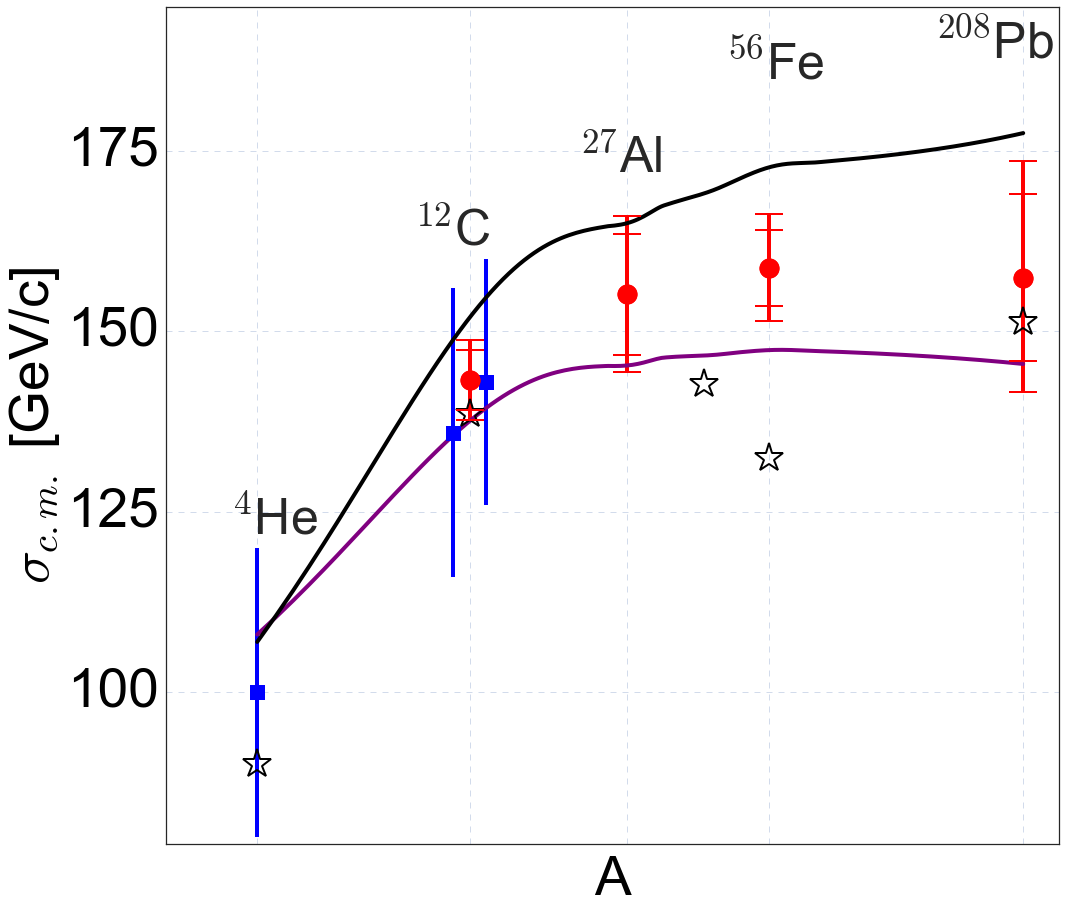

In [55]:
extraname=''
ax = plot_needed_for_A_depdendence_sigma_t(ylim=(79,195)
                                           ,labels=dict({'$^4$He':(3.5,122),
                                            '$^{12}$C':(9,162), '$^{27}$Al':(21,172),
                                            '$^{56}$Fe':(45,185), '$^{208}$Pb':(132,188), })
                                           ,do_Ciofi=True,fontsize=55)
plot_data_assymetric( data=nominal_results,direction='t',ax=ax, label="This work" , marker='o', markersize=20 , capthick=2, capsize=14 )
plot_data_assymetric( data=nominal_results ,direction='t', unc_name='stat' , ax=ax , marker='o', markersize=20 , capthick=2 , capsize=14)
plt.savefig(figures_path +'results.pdf')    

In [40]:
targets = ['C12','Al27','Fe56','Pb208']
colors = ['red','blue','purple','black']
target_names = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'] 
columns = ['Pmiss3Mag','pcmX','pcmY','pcmZ','rooWeight'] 
root_fname , data_allPmiss_PrecFid , ana = dict() , dict() , dict()
for target in targets:
    root_fname[target] = path+"/OrAnalysisTrees/AdjustedTrees/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target
    data_allPmiss_PrecFid[target] = read_root( root_fname[target] , columns=columns )
    ana[target] = data_allPmiss_PrecFid[target][data_allPmiss_PrecFid[target]['Pmiss3Mag']<0.6]
# results from Analysis_alaHalla_different_targets_bands.ipynb 
# Aug 9, 2017
AccCorr = pd.DataFrame({'A':[12 , 27 , 56 , 208],
                        's_t_measured':[159,172,181,176],
                        's_t_measured_Err':[5,9,6,13],
                       
                        's_x_corrected':[141,162,156,173],
                        's_x_corrected_Err':[6,13,7,19],

                        's_t_final':[143,155,159,157],
                        's_t_final_Err':[5,11,8,15]}

                       ,index = target_names)

    

C12 sigma: 158 MeV/c
Al27 sigma: 181 MeV/c
Fe56 sigma: 179 MeV/c
Pb208 sigma: 196 MeV/c


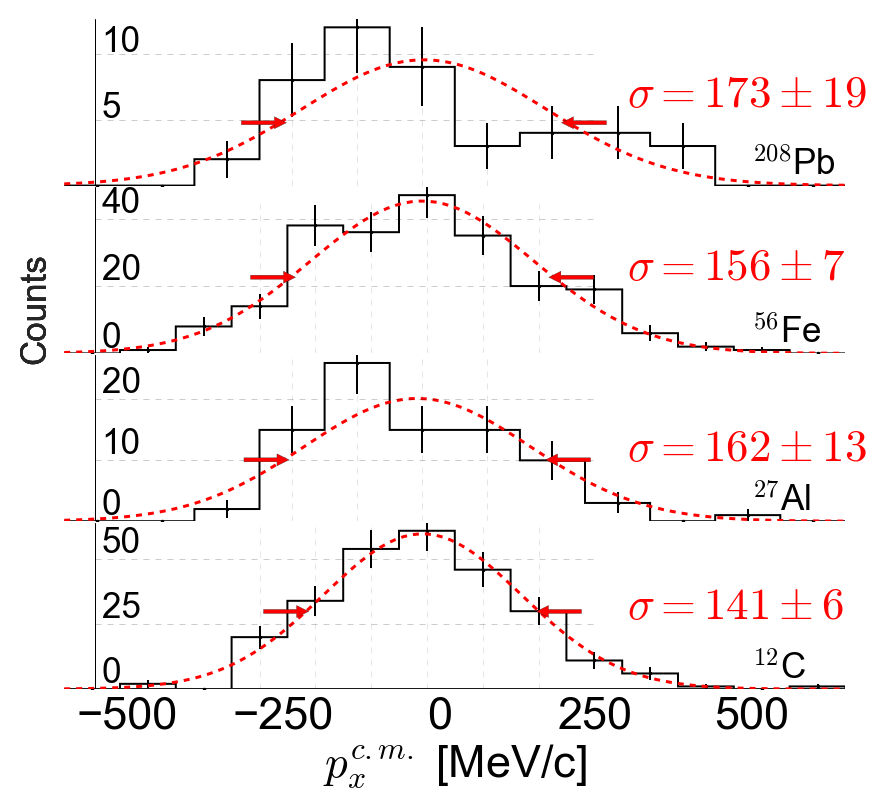

In [45]:
# make p(c.m.) in a nice style using also keyone
xmin , xmax  = -600,650
fontsize = 35
gauscolor = 'red'
figsize=(14,12)
fig = plt.figure(figsize=figsize)
nbins = [15 , 13 , 15 , 13]
y_ticks_targets = [[0, 25, 50],[0, 10, 20],[0, 20, 40],[5, 10]]
y_text_sigma = [27,10,22,6]

for i,target,target_name,color,y_ticks in zip(range(4)
                                              ,targets,target_names
                                              ,['black','black','black','black'],y_ticks_targets):
    bins = np.linspace(xmin , xmax , nbins[i] )

    x = 1000*ana[target].pcmX #np.sqrt(0.5)*(ana[target].pcmX + ana[target].pcmY)
    x_label = '$p^{c.m.}_{x}$ [MeV/c]' if target is 'C12' else '' # = (p^{c.m.}_{x}+p^{c.m.}_{y})/2
    mean = np.average(x)
    sigma = np.sqrt(np.average(np.square(x-mean)))   
    ax = fig.add_subplot(4,1,4-i)
    h,bins,_=plt.hist(x,bins=bins,histtype='step',linewidth=2,color=color);
    mid = bins[0:-1] + 0.5*(bins[1]-bins[0])
    plt.errorbar( mid , y=h , yerr=np.sqrt(h) , fmt='.',linewidth=2 , color=color);
    C = np.max(h)

    mean = np.mean(x)
    sigma = np.std(x)
    print target,'sigma: %.0f MeV/c'%(sigma)
    x_gaus = np.linspace(np.min(bins),np.max(bins),100)
    norm_fact = len(x)*(bins[1]-bins[0])
    y_gaus = norm_fact*mlab.normpdf(x_gaus, mean, sigma)
    y_sigma = 0.5*np.max(y_gaus)
    plt.plot(x_gaus,y_gaus,'--',color=gauscolor,linewidth=3);
    ymax = 1.05*np.max(h)
    ax.set_ylim(0,ymax)
    if i==0: plt.axhspan(xmin=-1,xmax=1,ymin=0,ymax=0,linewidth=3)
    else:
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.set_axis_off()
    plt.text(xmax-150 , 0.07*np.max(h) , target_name , color=color , fontsize=35)
    ax.set_xlim(xmin , xmax)
    plt.xticks(np.linspace(xmin + 200 , xmax - 200 , 5))
    set_axes(ax,x_label=x_label,fontsize=45)
    plt.subplots_adjust(hspace=0.01)
    # add grid lines
    for j,tick in zip(range(len(mid)),mid):
        if j < 3 or j > nbins[i]-7: continue 
        if i==2  :  y_max = 0.9*ymax # h[j]
        elif i==3:  y_max = h[j]
        else: y_max = ymax
        line = plt.Line2D([tick,tick],[0,y_max],linewidth=1,linestyle='--',color='black',alpha=0.1)
        ax.add_artist(line)
    # add x-axis to the bottom subplot (12C)
    if i==0:
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('none')
        ax.tick_params(labeltop='off', labelleft='off')
        customaxis(ax,c_left='none',c_bottom='none')
    # add vertical axes
    x_yaxis = -550 # xmin + 167.5*(xmax-xmin)*(1-0.2*i*0)
    line = plt.Line2D([x_yaxis,x_yaxis],[0,ymax],linewidth=1,linestyle='-',color=color)
    ax.add_artist(line)
    for y_tick in y_ticks: 
        ax.text(x_yaxis+10,y_tick+0.04*y_max,'%d'%y_tick,fontsize=fontsize,color=color)
        line = plt.Line2D([x_yaxis,-x_yaxis-300],[y_tick,y_tick],linewidth=1,linestyle='--',color=color,alpha=0.2)
        ax.add_artist(line)

    # add sigma lines and text
    s_t_final , s_t_final_Err = float(AccCorr[AccCorr.index==target_name]['s_x_corrected']),float(AccCorr[AccCorr.index==target_name]['s_x_corrected_Err'])

    x_text = xmax - 350 # mean+sigma+110
    plt.text(x_text, y_text_sigma[i],'$\\sigma=%.0f \pm %.0f $'%(s_t_final , s_t_final_Err)
             ,color=gauscolor,fontsize=45)
    ax.annotate('', xy=(mean+sigma+20, y_sigma), xytext=(mean+sigma+100, y_sigma),arrowprops=dict(facecolor=gauscolor, shrink=0.05))
    ax.annotate('', xy=(mean-sigma-20, y_sigma), xytext=(mean-sigma-100, y_sigma),arrowprops=dict(facecolor=gauscolor, shrink=0.05))
    plt.xticks([-500, -250, 0, 250, 500])
    plt.figtext(0.08,0.6,"Counts",fontdict={'fontsize':fontsize},rotation=90)